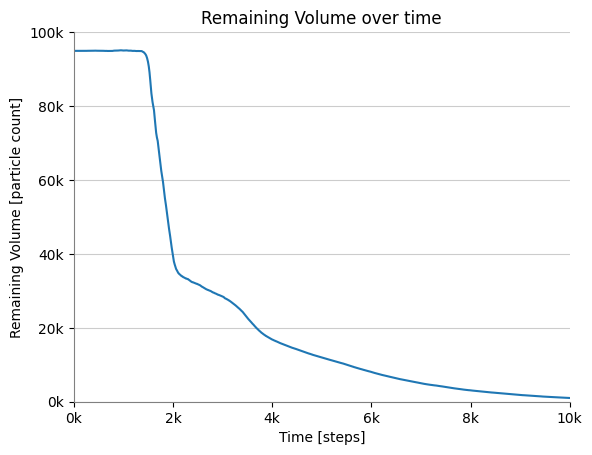

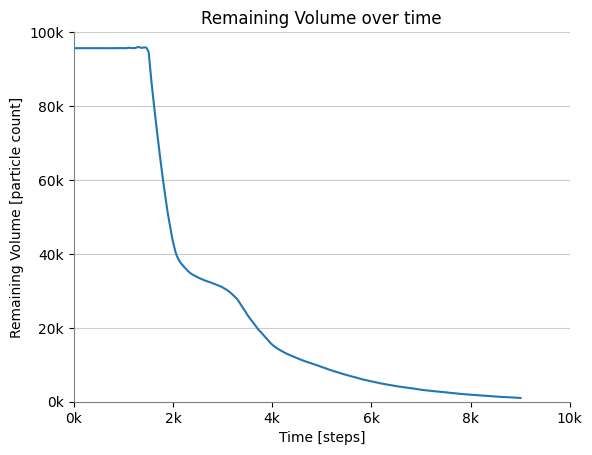

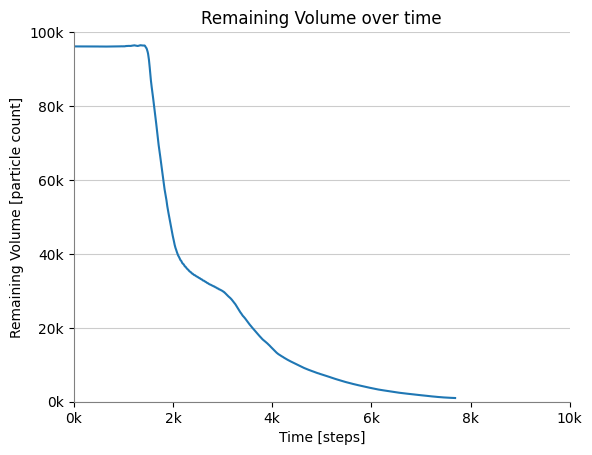

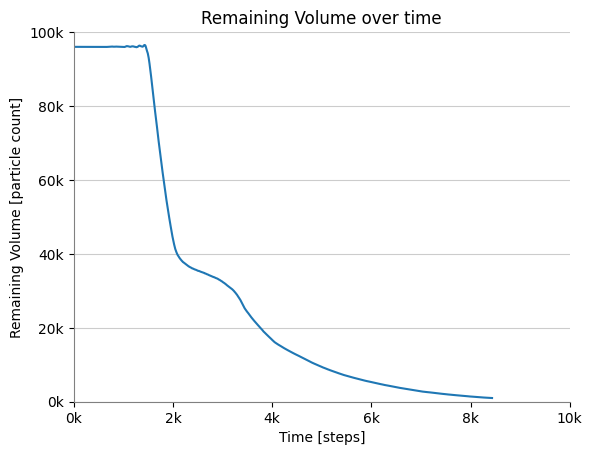

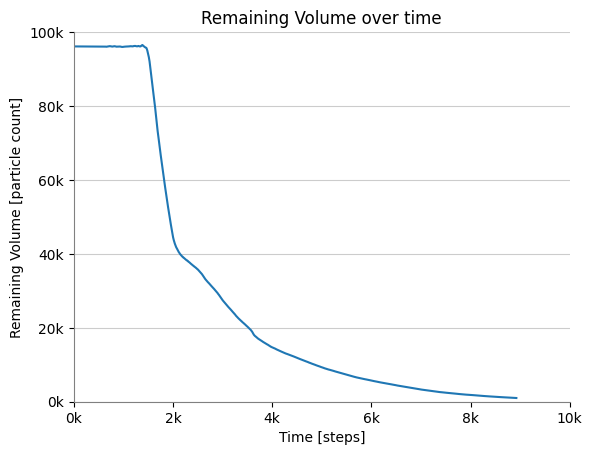

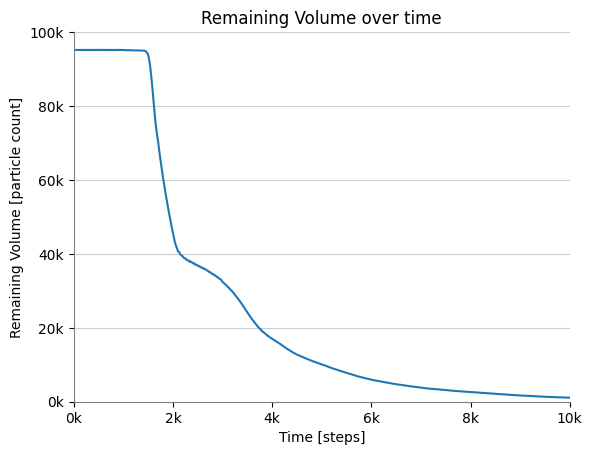

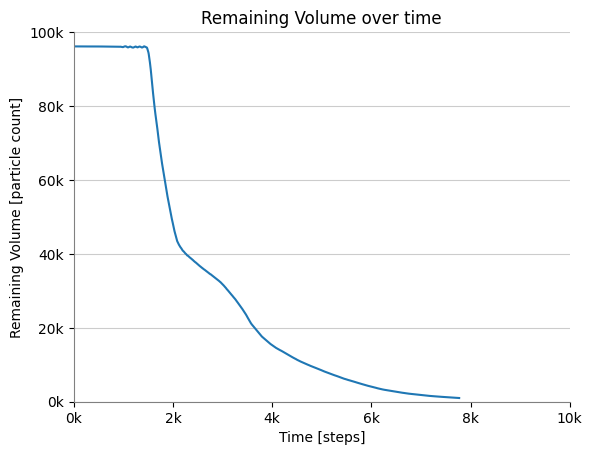

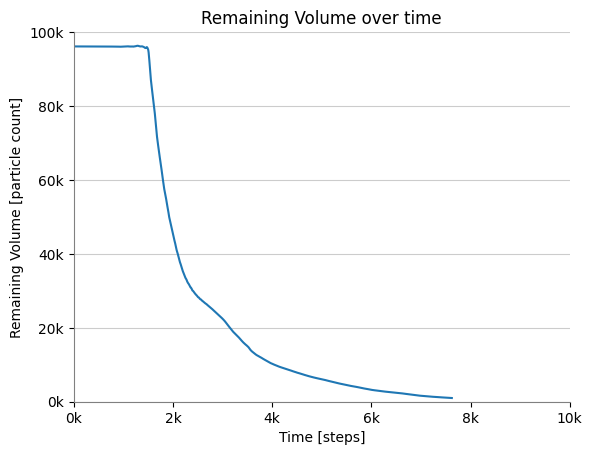

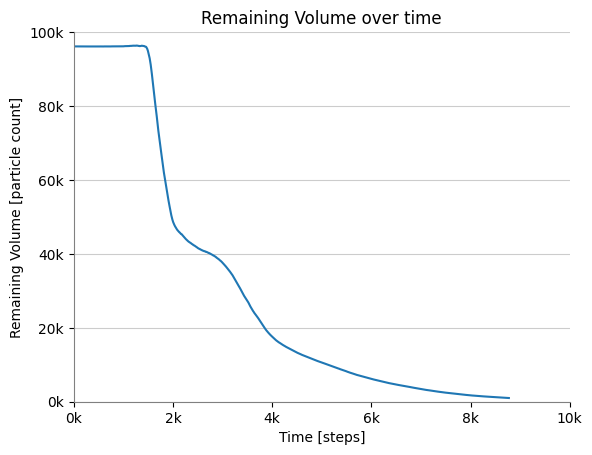

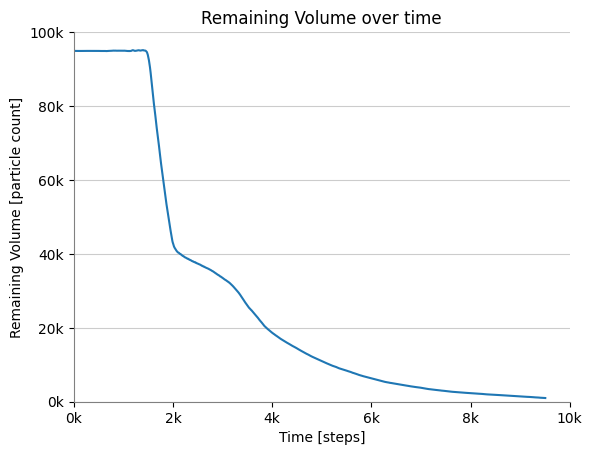

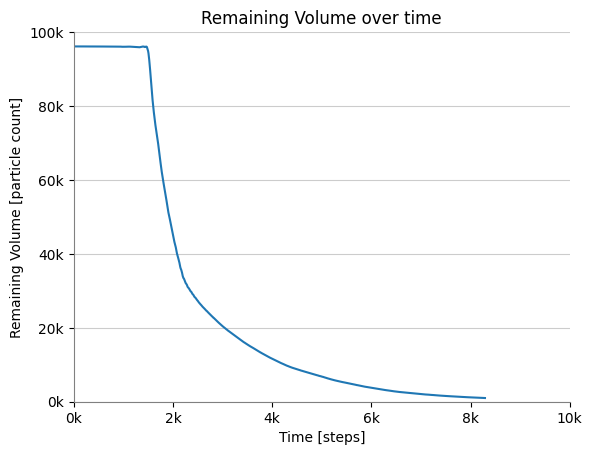

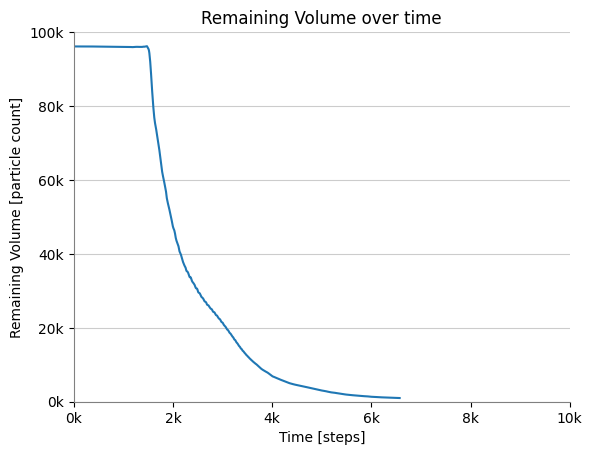

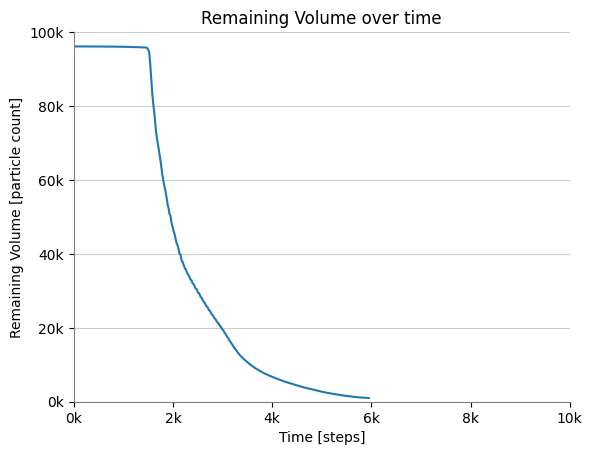

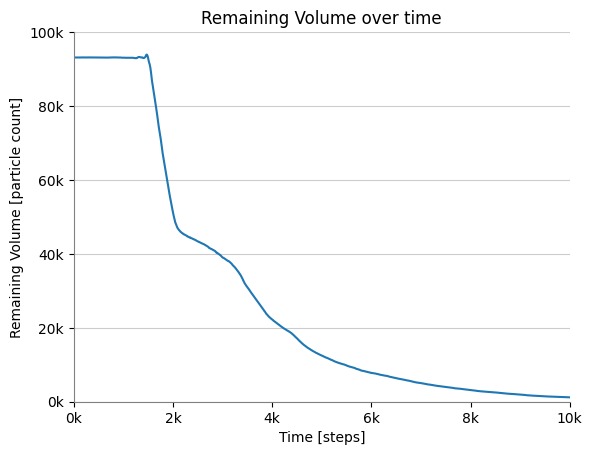

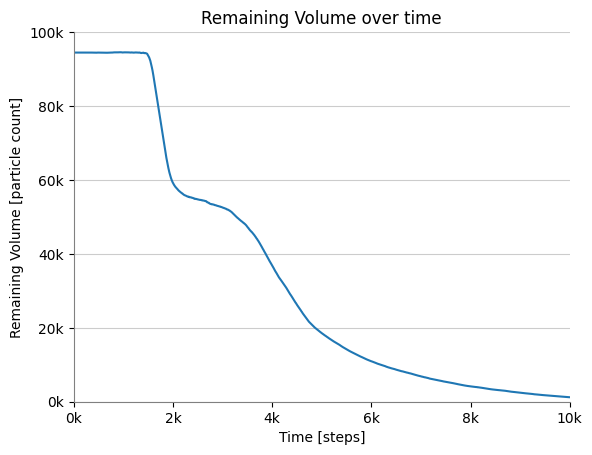

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

# Specify the folder path
folder_path = "./logs"

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    # Load the data from the text file
    with open(folder_path + "/" + filename, "r") as file:
        data = file.readlines()

    timesteps = []
    remaining_volumes = []

    # Extracting timestep and remaining volume values
    for entry in data:
        timestep, volume = entry.split("|")
        timesteps.append(int(timestep.strip()))
        remaining_volumes.append(float(volume.strip()))

    # Creating the plot
    plt.plot(timesteps, remaining_volumes)
    plt.xlabel("Time [steps]")
    plt.ylabel("Remaining Volume [particle count]")
    plt.title("Remaining Volume over time")
    plt.grid(True, axis="y", color="0.8")

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    # plt.gca().spines["bottom"].set_visible(False)
    # plt.gca().spines["left"].set_visible(False)
    plt.gca().spines["left"].set_color("0.5")
    plt.gca().spines["bottom"].set_color("0.5")

    formatter = FuncFormatter(lambda x, pos: f"{int(x/1000)}k")
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.ylim(0, 100000)

    plt.xlim(0, 10000)

    plt.savefig(
        "./graphs/" + filename.replace("txt", "png"), dpi=300, bbox_inches="tight"
    )

    plt.show()

C:\Users\corne\AppData\Local\Temp\ipykernel_14108\375906578.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Blues')


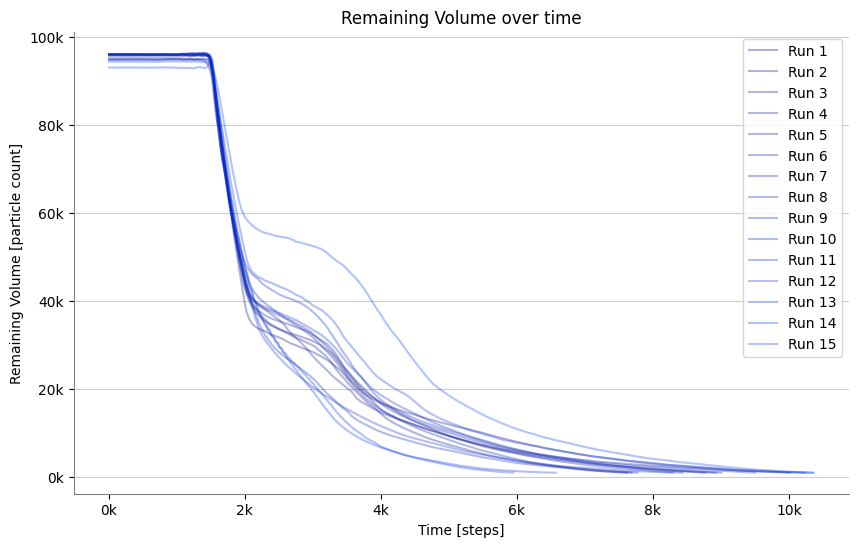

<Figure size 640x480 with 0 Axes>

In [63]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Specify the folder path containing the data files
folder_path = "./logs"

# Collect the paths of all text files in the folder
file_paths = [
    os.path.join(folder_path, filename)
    for filename in os.listdir(folder_path)
    if filename.endswith(".txt")
]

# Define a color map
colormap = plt.cm.get_cmap("Blues")
num_files = len(file_paths)
color_range = colors.LinearSegmentedColormap.from_list(
    "color_range",
    [colormap(0.1 + i * (0.1 / (num_files - 1))) for i in range(num_files)],
)

# Create the plot
plt.figure(figsize=(10, 6))

# Iterate over each file and plot the data
for i, file_path in enumerate(file_paths):
    with open(file_path, "r") as file:
        data = file.readlines()

    timesteps = []
    remaining_volumes = []

    # Extracting timestep and remaining volume values
    for entry in data:
        timestep, volume = entry.split("|")
        timesteps.append(int(timestep.strip()))
        remaining_volumes.append(float(volume.strip()))

    # Plotting the data with varying color
    plt.plot(
        timesteps,
        remaining_volumes,
        color=(0, i / num_files / 4, i / num_files / 2 + 0.5, 0.3),
        label=f"Run {i+1}",
    )

# Set the x-axis and y-axis labels
plt.xlabel("Time [steps]")
plt.ylabel("Remaining Volume [particle count]")
plt.title("Remaining Volume over time")
plt.grid(True, axis="y", color="0.8")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
# plt.gca().spines["bottom"].set_visible(False)
# plt.gca().spines["left"].set_visible(False)
plt.gca().spines["left"].set_color("0.5")
plt.gca().spines["bottom"].set_color("0.5")

formatter = FuncFormatter(lambda x, pos: f"{int(x/1000)}k")
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Add a legend
plt.legend()

# Show the plot
plt.show()
plt.savefig("./graphs/coke.png", dpi=300, bbox_inches="tight")